In [510]:
#read local directory file which is downloaded from 
#california housing dataset. # https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv


####- The model is used to predict the median house price, given other data inputs such as longitude, latitude and more. 

In [511]:
# all the libraries and function used

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer

In [512]:
#read csv file and inspect for the data. 


housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [513]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [514]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [515]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

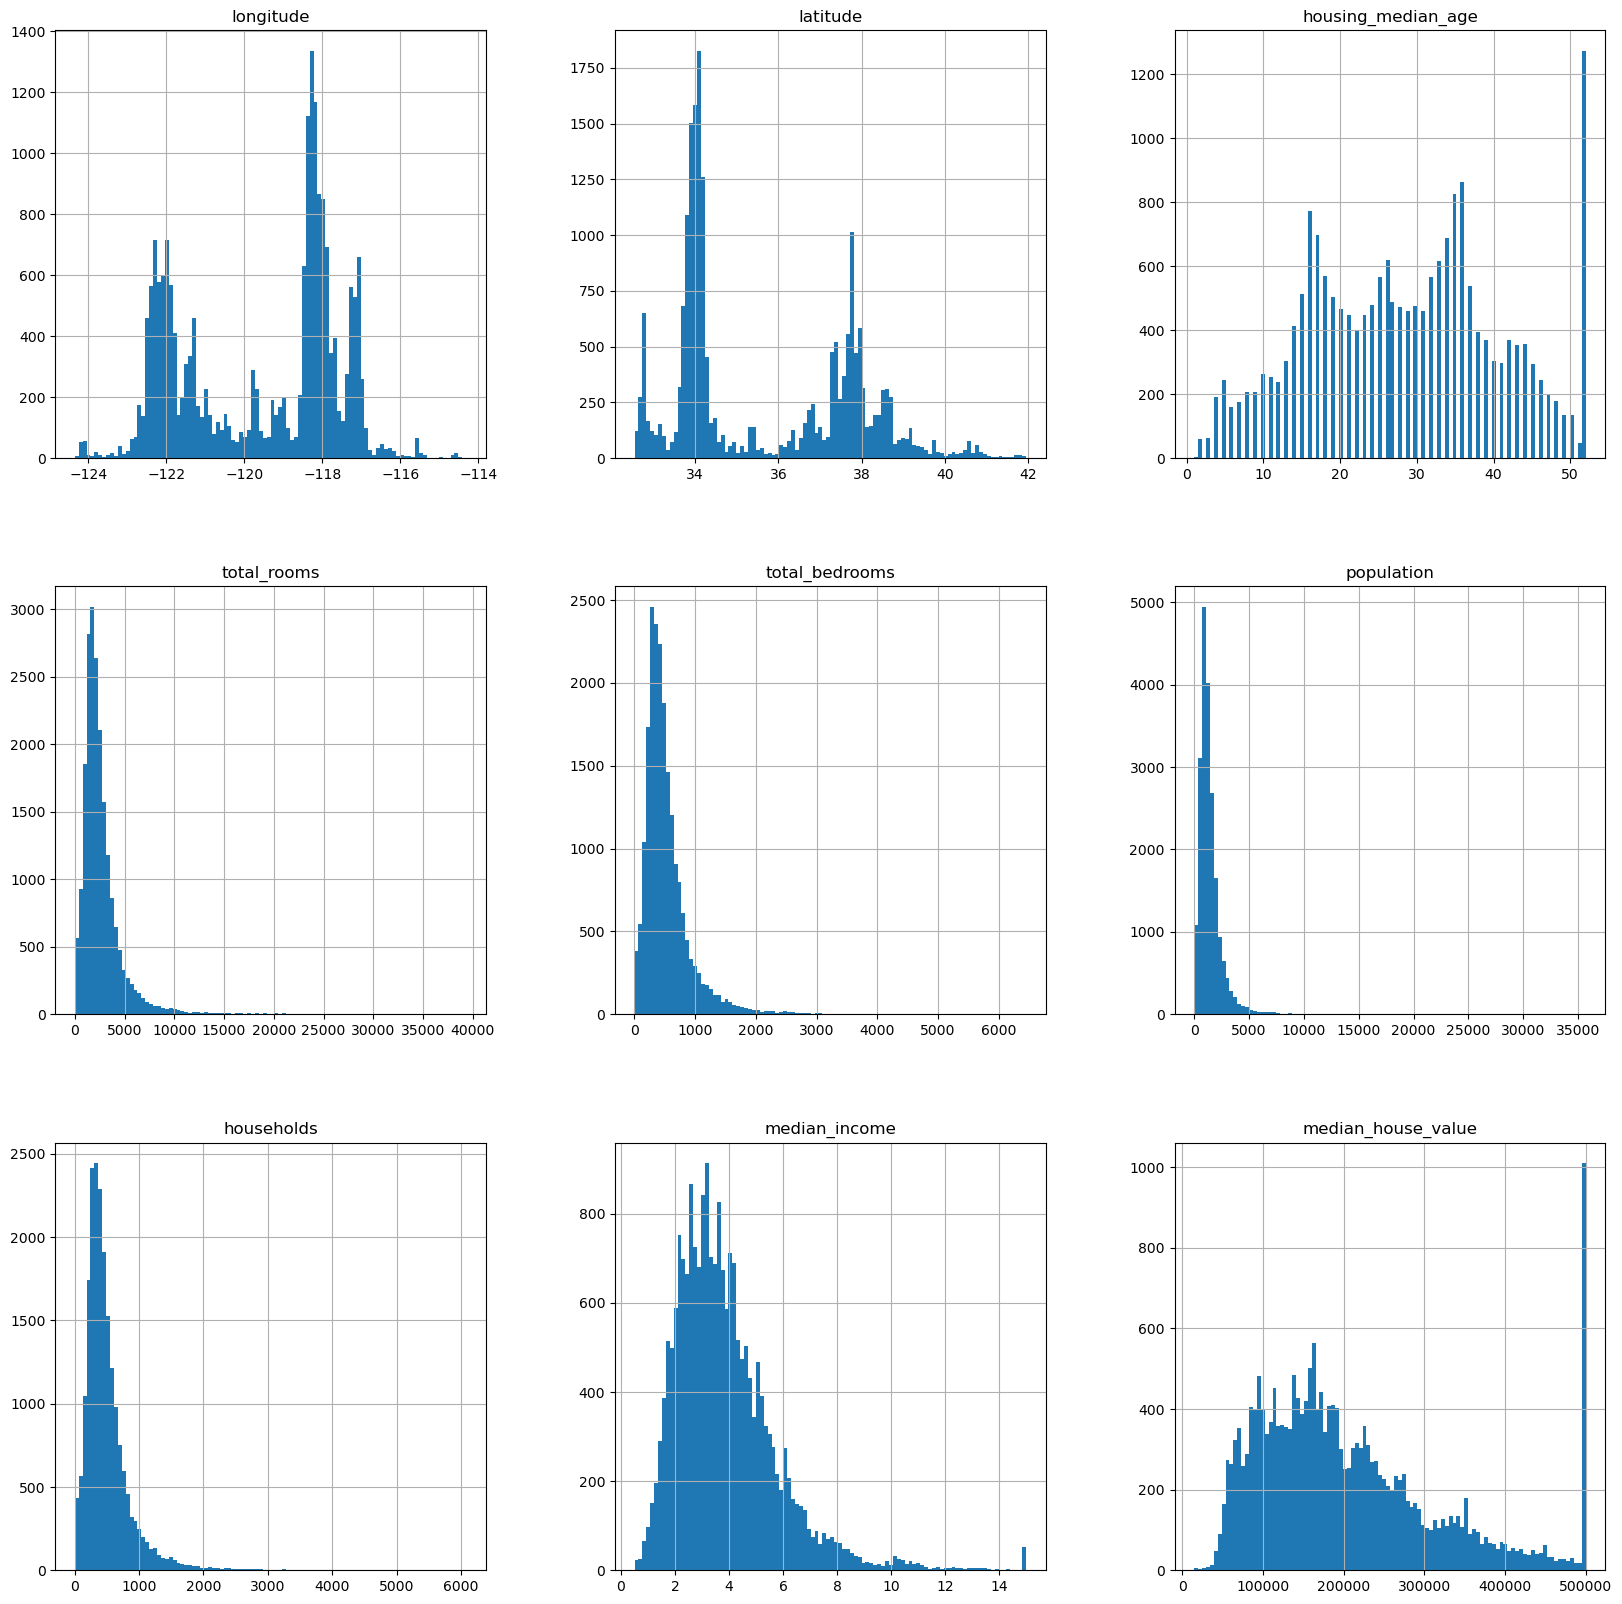

In [516]:
housing.hist(bins=100,figsize=(20,20))  # You can adjust the number of bins as needed
plt.show()


In [517]:
#looking for correlations coefficient and checking how each attribute correlate with median housing values.

# Select only numeric columns and hence dropping ocean_proximity.
numeric_columns = housing.drop('ocean_proximity',axis=1)

# Calculate the correlation matrix for numeric columns
corr_matrix = numeric_columns.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [518]:
##key points about data
#data has 10 attributes, with 9 as float numbers and 1 as object.Object is of a category type
#data is capped for certain attribute such as: median_house_value;housing_median_age.
# it correlates highly with median income attribute and hence I will use this attribute for stratified Sampling.


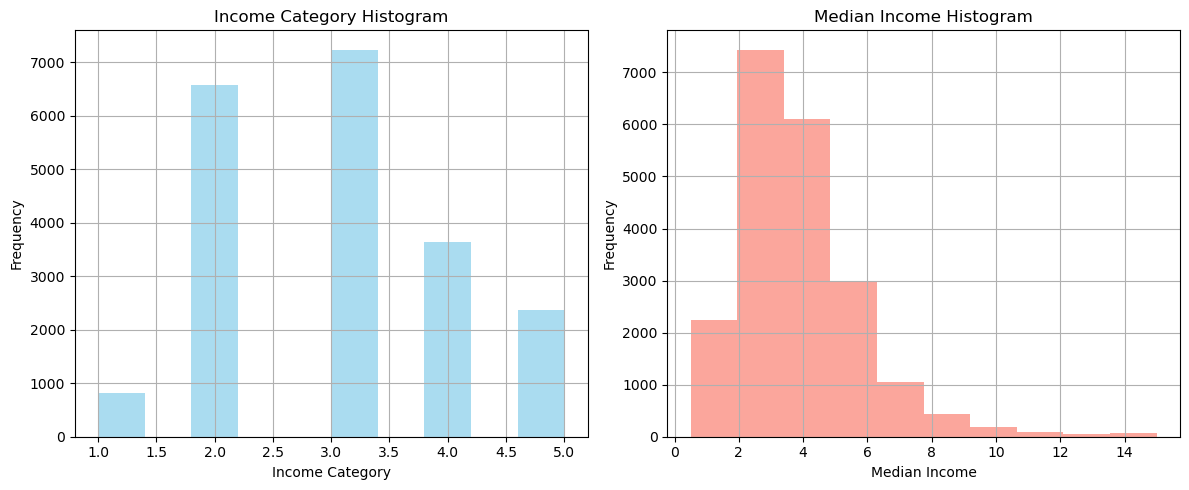

In [519]:
#import numpy as np 

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

#import matplotlib.pyplot as plt

# Plot histogram for "income_cat"
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # Create the left subplot
housing["income_cat"].hist(color='skyblue', alpha=0.7)
plt.title('Income Category Histogram')
plt.xlabel('Income Category')
plt.ylabel('Frequency')

# Plot histogram for "median_income"
plt.subplot(1, 2, 2)  # Create the right subplot
housing["median_income"].hist(color='salmon', alpha=0.7)
plt.title('Median Income Histogram')
plt.xlabel('Median Income')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjusting subplot spacing
plt.show()  
# Display both histograms of new attirbute income_cat and existing attribute Median income
# to further visualize the distrubution by using stratified sampling.


In [520]:
#here I am using  Scikit-Learn’s StratifiedShuffleSplit class for stratified sampling.
#using new created attribute "income_cat"


#from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [521]:
#removing temporary new attribute create i.e. "income_cat" in newly created training and test set.
#so that original dataset is intacked. 

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [522]:
#from sklearn.model_selection import train_test_split

strat_train_set, strat_validation_set = train_test_split(strat_train_set, test_size=0.05, random_state=42)

In [523]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15686 entries, 9816 to 19658
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15686 non-null  float64
 1   latitude            15686 non-null  float64
 2   housing_median_age  15686 non-null  float64
 3   total_rooms         15686 non-null  float64
 4   total_bedrooms      15537 non-null  float64
 5   population          15686 non-null  float64
 6   households          15686 non-null  float64
 7   median_income       15686 non-null  float64
 8   median_house_value  15686 non-null  float64
 9   ocean_proximity     15686 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [524]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 5241 to 3965
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4079 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


In [525]:
strat_validation_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 826 entries, 2924 to 6868
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           826 non-null    float64
 1   latitude            826 non-null    float64
 2   housing_median_age  826 non-null    float64
 3   total_rooms         826 non-null    float64
 4   total_bedrooms      817 non-null    float64
 5   population          826 non-null    float64
 6   households          826 non-null    float64
 7   median_income       826 non-null    float64
 8   median_house_value  826 non-null    float64
 9   ocean_proximity     826 non-null    object 
dtypes: float64(9), object(1)
memory usage: 71.0+ KB


In [526]:
#Going forward to train model, I will only use training set. 
#total bedroom has some missing numbers. I will replace it with mean values of that attribute, 
#I am assuming dataset has no outliers and data quality is good. If not, Median is preferred. 

In [527]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


In [528]:
#this shows sample of rows which has empty values in total_bedrooms attribute.
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5236,-118.23,33.94,36.0,1110.0,NaN,1417.0,302.0,2.3333,<1H OCEAN
17639,-121.90,37.28,26.0,3756.0,NaN,1408.0,535.0,5.6427,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
18914,-122.22,38.15,7.0,5129.0,NaN,2824.0,738.0,5.5138,NEAR BAY
16879,-122.39,37.60,34.0,707.0,NaN,381.0,156.0,4.3750,NEAR OCEAN


In [529]:
#from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
housing_num = housing.drop("ocean_proximity", axis=1)



In [530]:
imputer.fit(housing_num)
imputer.statistics_
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)

In [531]:

housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5236,-118.23,33.94,36.0,1110.0,534.267684,1417.0,302.0,2.3333
17639,-121.90,37.28,26.0,3756.0,534.267684,1408.0,535.0,5.6427
19150,-122.70,38.35,14.0,2313.0,534.267684,954.0,397.0,3.7813
18914,-122.22,38.15,7.0,5129.0,534.267684,2824.0,738.0,5.5138
16879,-122.39,37.60,34.0,707.0,534.267684,381.0,156.0,4.3750


In [532]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15686 entries, 9816 to 19658
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15686 non-null  float64
 1   latitude            15686 non-null  float64
 2   housing_median_age  15686 non-null  float64
 3   total_rooms         15686 non-null  float64
 4   total_bedrooms      15686 non-null  float64
 5   population          15686 non-null  float64
 6   households          15686 non-null  float64
 7   median_income       15686 non-null  float64
dtypes: float64(8)
memory usage: 1.6 MB


In [533]:
housing['ocean_proximity'].head()

9816     NEAR OCEAN
13797        INLAND
912       <1H OCEAN
1670       NEAR BAY
18896      NEAR BAY
Name: ocean_proximity, dtype: object

In [534]:
housing['ocean_proximity'].info()

<class 'pandas.core.series.Series'>
Index: 15686 entries, 9816 to 19658
Series name: ocean_proximity
Non-Null Count  Dtype 
--------------  ----- 
15686 non-null  object
dtypes: object(1)
memory usage: 761.1+ KB


In [535]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)

# Fit and transform the categorical feature
housing_cat_1hot = cat_encoder.fit_transform(housing[["ocean_proximity"]])

# Display the result as a dense NumPy array
print(housing_cat_1hot)


[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [536]:
housing_cat_1hot_df = pd.DataFrame(housing_cat_1hot).reset_index(drop=True)
housing_tr_df = pd.DataFrame(housing_tr).reset_index(drop=True)

combined = pd.concat([housing_tr_df, housing_cat_1hot_df], axis=1)


In [537]:
combined

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,0,1,2,3,4
0,-121.93,36.62,39.0,869.0,173.0,406.0,165.0,4.0313,0.0,0.0,0.0,0.0,1.0
1,-117.40,34.58,18.0,755.0,169.0,483.0,165.0,1.4196,0.0,1.0,0.0,0.0,0.0
2,-122.00,37.54,26.0,1910.0,371.0,852.0,357.0,5.8325,1.0,0.0,0.0,0.0,0.0
3,-122.23,38.05,52.0,1736.0,358.0,638.0,297.0,2.5517,0.0,0.0,0.0,1.0,0.0
4,-122.24,38.12,42.0,1625.0,255.0,578.0,243.0,4.0114,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15681,-124.18,40.79,40.0,1398.0,311.0,788.0,279.0,1.4668,0.0,0.0,0.0,0.0,1.0
15682,-120.98,37.65,36.0,826.0,167.0,432.0,150.0,2.5000,0.0,1.0,0.0,0.0,0.0
15683,-121.70,37.93,19.0,2005.0,405.0,972.0,403.0,2.2216,0.0,1.0,0.0,0.0,0.0
15684,-121.87,37.26,17.0,1051.0,172.0,446.0,173.0,5.6652,1.0,0.0,0.0,0.0,0.0


In [538]:
# 
combined.columns = combined.columns.astype(str)




from sklearn.preprocessing import StandardScaler

# 
scaler = StandardScaler()

# Fit the scaler to data, this computes the mean and standard deviation to be used for later scaling.
scaler.fit(combined)

# Perform the standardization by centering and scaling
housing_prepared = scaler.transform(combined)


In [539]:
housing_prepared

array([[-1.17162088,  0.45510124,  0.82222523, ..., -0.01129241,
        -0.35607144,  2.6091885 ],
       [ 1.08749228, -0.49746186, -0.84550417, ..., -0.01129241,
        -0.35607144, -0.38326093],
       [-1.20652991,  0.88468852, -0.21017868, ..., -0.01129241,
        -0.35607144, -0.38326093],
       ...,
       [-1.05691977,  1.06679617, -0.76608848, ..., -0.01129241,
        -0.35607144, -0.38326093],
       [-1.14169885,  0.75394456, -0.92491985, ..., -0.01129241,
        -0.35607144, -0.38326093],
       [-0.63801137,  0.87534966, -1.56024534, ..., -0.01129241,
        -0.35607144, -0.38326093]])

In [540]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [541]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69130.35169352625

above is the prediction error for median_house_value +- 69130.35 for mean value of 206855.82. It is an simple implementation of linear regression model with data processed and its an example of model underfitting the training data- strat_train_set